# Predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.

In [7]:
# pip install graphviz

In [8]:
# pip install pydotplus

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

## Read File

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine-learning/bank-marketing-term-deposit-classification-decision-tree/bank-marketing.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [13]:
# age - slightly right skewed as mean > median
# balance - highly right skewed as mean >> meadin
# day - normal
# duration - right skewed as mean > median
# campaign - slightly right skewed as mean > median
# pdays - highly right skewed as mean > median
# previous - right skewed mean > median

## Checking Null Values

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:
# corrmat = df.corr()
# k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'age')['age'].index
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [16]:
# hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
# plt.show()

### Checking Outliers

Age 

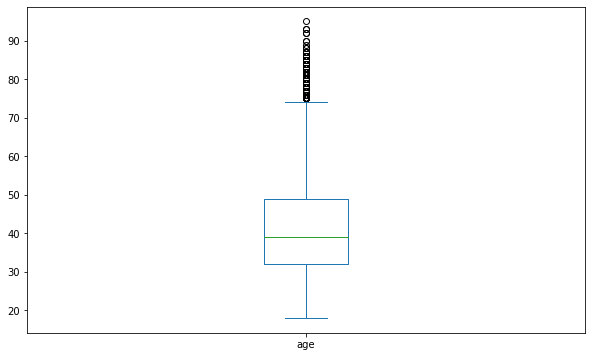

In [17]:
plt.figure(figsize=(10,6))
df.age.plot(kind='box')

In [18]:
df['age'].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [19]:
df.drop(df[df['age']>48].index,axis=0,inplace=True)

In [20]:
df.drop(df[df['age']<32].index,axis=0,inplace=True)

balance

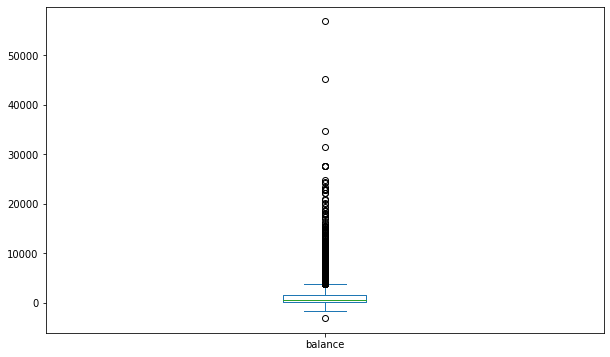

In [21]:
plt.figure(figsize=(10,6))
df.balance.plot(kind='box')

In [22]:
df['balance'].describe()

count     5753.000000
mean      1412.291152
std       2766.016653
min      -3058.000000
25%        104.000000
50%        530.000000
75%       1582.000000
max      56831.000000
Name: balance, dtype: float64

In [23]:
df.drop(df[df['balance']>1708].index,axis=0,inplace=True)

In [24]:
df.drop(df[df['balance']<122].index,axis=0,inplace=True)

day

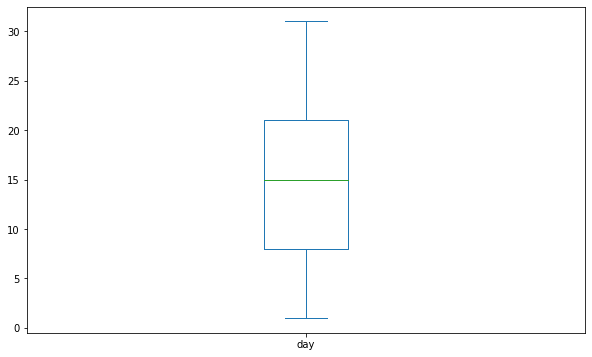

In [25]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [26]:
df['day'].describe()

count    2896.000000
mean       15.275552
std         8.346845
min         1.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

In [27]:
# df.drop(df[df['day']>19].index,axis=0,inplace=True)

In [28]:
# df.drop(df[df['day']<12].index,axis=0,inplace=True)

duration

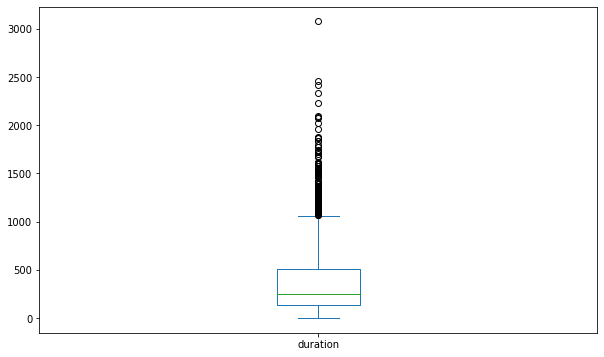

In [29]:
plt.figure(figsize=(10,6))
df.duration.plot(kind='box')

In [30]:
df['duration'].describe()

count    2896.000000
mean      373.242058
std       352.918286
min         2.000000
25%       132.000000
50%       252.000000
75%       507.000000
max      3076.000000
Name: duration, dtype: float64

In [31]:
df.drop(df[df['duration']>290].index,axis=0,inplace=True)

In [32]:
df.drop(df[df['duration']<106].index,axis=0,inplace=True)

campaign  

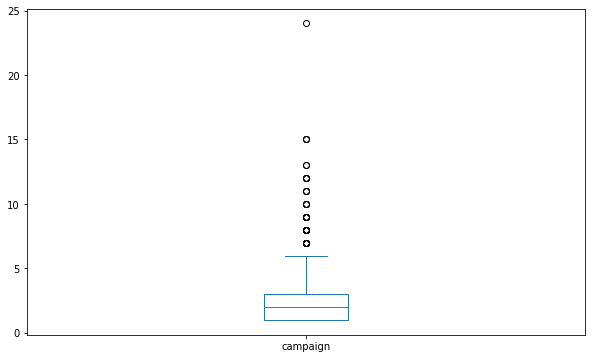

In [33]:
plt.figure(figsize=(10,6))
df.campaign.plot(kind='box')

In [34]:
df['campaign'].describe()

count    1102.000000
mean        2.279492
std         2.043558
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        24.000000
Name: campaign, dtype: float64

In [35]:
df.drop(df[df['campaign']>3].index,axis=0,inplace=True)

pdays

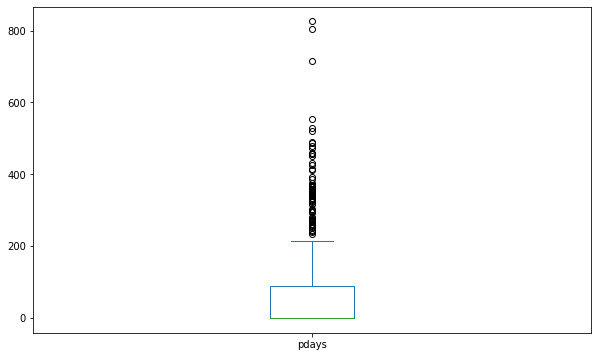

In [36]:
plt.figure(figsize=(10,6))
df.pdays.plot(kind='box')

In [37]:
df["pdays"].describe()

count    933.000000
mean      56.739550
std      114.800871
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       88.000000
max      826.000000
Name: pdays, dtype: float64

In [38]:
df.drop(df[df['pdays']>92].index,axis=0,inplace=True)

pervious

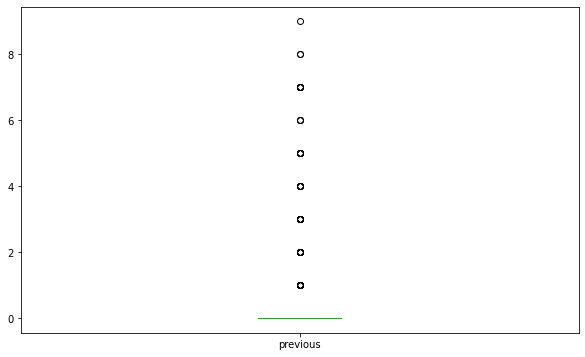

In [39]:
plt.figure(figsize=(10,6))
df.previous.plot(kind='box')

In [40]:
df['previous'].describe()

count    728.000000
mean       0.281593
std        1.135445
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: previous, dtype: float64

In [41]:
df.drop(df[df['previous']>0].index,axis=0,inplace=True)

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
207,35,management,married,tertiary,no,867,yes,no,unknown,2,jun,230,3,-1,0,unknown,yes
900,40,technician,divorced,tertiary,no,568,yes,no,unknown,24,oct,112,1,-1,0,unknown,yes
913,42,technician,divorced,secondary,no,314,yes,no,unknown,30,oct,234,1,-1,0,unknown,yes
914,43,retired,married,secondary,no,860,no,no,telephone,30,oct,132,1,-1,0,unknown,yes
918,39,blue-collar,married,secondary,no,1307,yes,no,telephone,31,oct,158,1,-1,0,unknown,yes


In [43]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.0,665.0
mean,38.648120,663.236090,15.106767,187.494737,1.631579,-1.0,0.0
std,4.833627,428.646142,8.617492,52.846337,0.716350,0.0,0.0
min,32.000000,124.000000,1.000000,106.000000,1.000000,-1.0,0.0
25%,35.000000,307.000000,7.000000,141.000000,1.000000,-1.0,0.0
50%,38.000000,568.000000,15.000000,182.000000,1.000000,-1.0,0.0
75%,42.000000,951.000000,21.000000,235.000000,2.000000,-1.0,0.0
max,48.000000,1704.000000,31.000000,290.000000,3.000000,-1.0,0.0


## Data Pre-Processing

In [44]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [45]:
encoded_df = preprocessor(df)
encoded_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
207,35,4,1,2,0,867,1,0,2,2,6,230,3,-1,0,0,1
900,40,9,0,2,0,568,1,0,2,24,10,112,1,-1,0,0,1


In [46]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

### Split Data into Train and Test data sets

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Build Decision Tree Model

### Decision Tree with Cart(Gini)

###### Decision Tree with depth 2

In [48]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Training Score 0.8120300751879699
Testing Score 0.8421052631578947


###### Decision Tree with depth 4

In [49]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Training Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Training Score 0.849624060150376
Testing Score 0.8721804511278195


###### Decision Tree with depth 6

In [50]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Trining Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Trining Score 0.9060150375939849
Testing Score 0.8796992481203008


###### Decision Tree with depth 8

In [51]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Trining Score 0.9624060150375939
Testing Score 0.8195488721804511


### Decision Tree with c4.5(entropy)

In [52]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.7819548872180451
0.8045112781954887


## Graphical Represetation of Tree

In [53]:
# conda install graphviz

In [54]:
from io import StringIO

In [55]:
# from sklearn.externals.six import StringIO

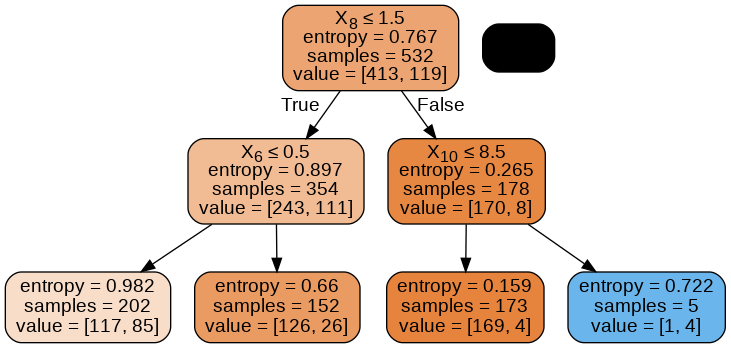

<Figure size 720x576 with 0 Axes>

In [56]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Performance Matrics

In [57]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [58]:
predictions = model_dt_6.predict(x_test)
# print(predictions)

print(model_dt_6.score(x_test,y_test))
y_actual_result = y_test[0]
# print(y_actual_result)

0.8796992481203008


## Insert New Column with Prediction

In [59]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [60]:
df_preditor_without_target = encoded_df.drop('deposit',axis=1).values
df_preditor_only_target = encoded_df['deposit'].values

In [61]:
print(df_preditor_only_target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [62]:
predictions1 = model_dt_6.predict(df_preditor_without_target)

In [63]:
print(predictions1)

[1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

In [64]:
encoded_df['test_data'] = np.where(df_preditor_only_target,predictions1,df_preditor_only_target)

In [65]:
df['test_data'] = np.where(df_preditor_only_target,predictions1,df_preditor_only_target)

In [66]:
encoded_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,test_data
207,35,4,1,2,0,867,1,0,2,2,6,230,3,-1,0,0,1,1
900,40,9,0,2,0,568,1,0,2,24,10,112,1,-1,0,0,1,1
913,42,9,0,1,0,314,1,0,2,30,10,234,1,-1,0,0,1,1


In [67]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,test_data
207,35,management,married,tertiary,no,867,yes,no,unknown,2,jun,230,3,-1,0,unknown,yes,1
900,40,technician,divorced,tertiary,no,568,yes,no,unknown,24,oct,112,1,-1,0,unknown,yes,1
913,42,technician,divorced,secondary,no,314,yes,no,unknown,30,oct,234,1,-1,0,unknown,yes,1


In [68]:
df['test_data'].replace(to_replace=1,value='True',inplace=True)

In [69]:
df['test_data'].replace(to_replace=0,value='False',inplace=True)

In [70]:
df.to_csv('Bank_with_Prediction_3_Point_Summary.csv')

## Area Under the Curve

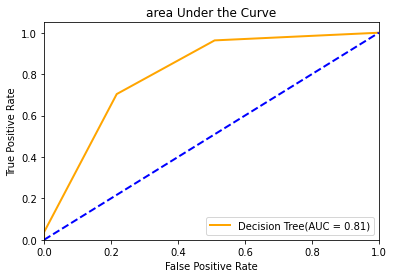

In [71]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## Confusion Matrix

In [72]:
print(confusion_matrix(y_test,predictions))

[[100   6]
 [ 10  17]]


In [73]:
accuracy_score(y_test,predictions)

0.8796992481203008

In [74]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

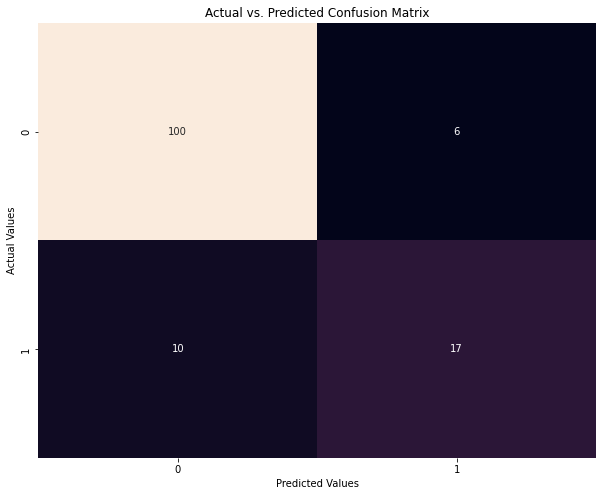

In [75]:
plt.figure(figsize=(10,8))
conf_mat = create_conf_mat(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [76]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model,normalize=False):
    cm = confusion_matrix(y_test,model,labels=[0,1])
    classes = ["Success","Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matix"
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

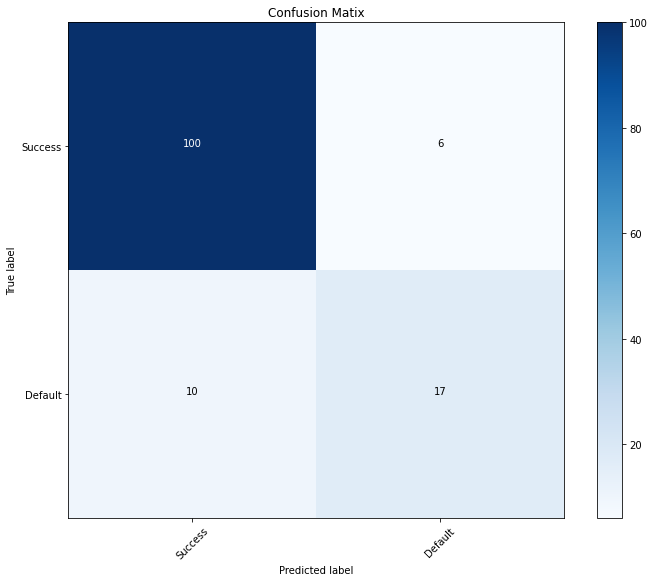

In [77]:
plt.figure(figsize=(10,8))
plot_confusion_matrix(predictions, normalize=False)
plt.show()